<a href="https://colab.research.google.com/github/swill200/DeepLearning/blob/main/M2_Homework_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## M2 Homework: Proof of GPU-Enabled Notebook and MNIST questions

#### Student name: Stephen Williams
#### Course: COSC 525 - Deep Learning
#### Instructor: Dr. Rhema Linder
#### Semester: Spring 2025


In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


# Question Set 1: What GPU and Jupyter Notebook System are you Using?

### In plain language, what is the GPU that shows as available above?

### Answer: 1

### What system (local, homelab, Google Colab, are you using?

### Answer: Google Colab


# MNIST

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

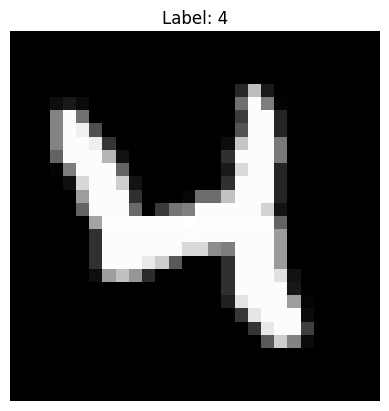

In [ ]:
#visualize a single digit

import matplotlib.pyplot as plt
image_index = 20
first_image = train_images[image_index].reshape((28, 28))
plt.imshow(first_image, cmap='gray')
plt.title('Label: {}'.format(train_labels[image_index]))
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8722 - loss: 0.4462
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9653 - loss: 0.1185
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0746
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0339


**Using the model to make predictions**

In [ ]:
# test_digits = test_images[0:10]
predictions = model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.79338686e-08, 1.22090382e-08, 2.03710283e-06, 5.70236662e-05,
       3.88608416e-11, 3.67636481e-08, 1.55733586e-12, 9.99939919e-01,
       1.15829394e-07, 8.40029259e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9999399

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0815
test_acc: 0.9783999919891357


Misclassified test image index: 247
Predicted label: 6
Actual label: 4


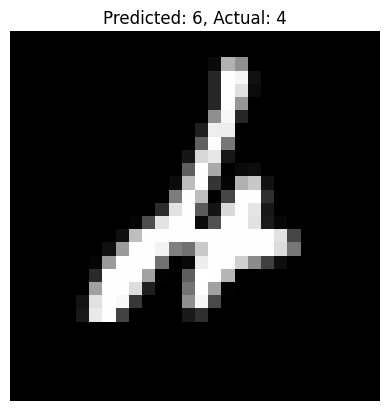

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predicted_labels = np.argmax(predictions, axis=1)

incorrect_indices = np.where(predicted_labels != test_labels)[0]

if len(incorrect_indices) > 0:
    idx = incorrect_indices[0]
    print("Misclassified test image index:", idx)
    print("Predicted label:", predicted_labels[idx])
    print("Actual label:", test_labels[idx])

    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[idx]}, Actual: {test_labels[idx]}")
    plt.axis('off')
    plt.show()
else:
    print("No misclassifications found!")

# Question Set 2: Use the Above Code and Modify It to Answer:

### Find an example index of which prediction failed. What is the index?

### Answer: 247

### Why did that prediction fail? Visualize the test data and explain why the prediction was wrong.

### Answer: It appears the model failed to predict this index correctly because it looks like an H more than an actual digit.